# Question 5:
# Submitted by: Sayan Chakraborty, EE18MTECH11030

## N-armed bandit problem $\epsilon$-greedy approach
### Given, the following:
-  $n$ = 10,
-  a = 1, 2, 3, ..., 10,
-  $q(a)$ ~ $N(0,1)$ $\forall$ a,
-  at $t^{th}$ step, the actual reward is $R_{t} = q(A_{t}) + N(0,1)$, where $A_{t}$ is the action taken at the $t^{th}$ step,
-  Number of tasks = 2000,
-  Number of steps in each task = 1000.

### To find:
-  Optimal action taken for each method by averaging over bandits.
-  Average reward received by averaging over bandits.



In [1]:
import numpy as np
import matplotlib.pyplot as plt 

### Define the N-armed bandit problem as follows:

In [2]:

def initialization(): # initialize and define the attributes
    N_sample_action = np.zeros(10)               # number of times an action is sampled
    actual_arm_vals = np.random.normal(0, 1, 10) # actual arm values
    est_arm_vals = np.zeros(10)                  # estimated values of the arms
    return N_sample_action, actual_arm_vals, est_arm_vals

def choose_action_value_method(epsilon, est_arm_vals): # choose between greedy and non-greedy action, epsilon in [0, 1].

    rand_num = np.random.random()              # selects a sample from an uniform distribution with a = 0, b = 1
    if epsilon>rand_num:                       # P(rand_num<epsilon) = epsilon, with probability epsilon we choose to explore
        return np.random.randint(10)
    else:
        return np.argmax(est_arm_vals)    # gives the index of the maximum value

def action_reward(action, actual_arm_vals): 
    reward = actual_arm_vals[action]+np.random.normal(0,1)
    return reward # the reward for each action

def est_arm_vals_update(reward, action, N_sample_action, est_arm_vals): # update the estimated values of the arms

    N_sample_action[action] += 1          # add 1 when the action is sampled
    k = N_sample_action[action]           # it is the number of times the action is sampled
    est_arm_vals[action] += (1./k)*(reward - est_arm_vals[action]) # using sample average method with incremental implementation for calculating the value estimates
    return est_arm_vals, N_sample_action

def n_optimal_actions(action, actual_arm_vals): # method to check if the action selected is an optimal one

    if action == np.argmax(actual_arm_vals):
        return 1
    else:
        return 0

def expt_steps(N_steps, epsilon, N_sample_action, actual_arm_vals, est_arm_vals): 
    reward = []
    optimal_action = []

    for i in range(N_steps):
        action = choose_action_value_method(epsilon, est_arm_vals)    # choose a non-greedy action with epsilon probability
        R = action_reward(action, actual_arm_vals)                    # get a reward for the chosen action
        opt_act = n_optimal_actions(action, actual_arm_vals)          # check whether the action selected is optimal or not
        est_arm_vals, N_sample_action = est_arm_vals_update(R, action, N_sample_action, est_arm_vals)   # update the arm value estimates
        reward.append(R)                                  # append all reward
        optimal_action.append(opt_act)                    # append all optimal action indicators
    return np.array(reward), np.array(optimal_action)     # return rewards and optimal action indicators


### Perform N tasks, here N=2000

In [3]:
epsilon = np.array([0, 0.01, 0.1])
N_steps = 1000  # number of steps 
N_tasks = 2000  # number of tasks

average_reward_epsi_0_00 = np.zeros(N_steps)
average_reward_epsi_0_01 = np.zeros(N_steps)
average_reward_epsi_0_1 = np.zeros(N_steps)

average_optimal_action_0_00 = np.zeros(N_steps)
average_optimal_action_0_01 = np.zeros(N_steps)
average_optimal_action_0_1 = np.zeros(N_steps)

for i in range(N_tasks):
    N_sample_action, actual_arm_vals, est_arm_vals = initialization()
    r, o_act = expt_steps(N_steps, 0, N_sample_action, actual_arm_vals, est_arm_vals)
    average_reward_epsi_0_00 += r
    average_optimal_action_0_00 += o_act
    
    N_sample_action, actual_arm_vals, est_arm_vals = initialization()
    r, o_act = expt_steps(N_steps, 0.01, N_sample_action, actual_arm_vals, est_arm_vals)
    average_reward_epsi_0_01 += r
    average_optimal_action_0_01 += o_act
    
    N_sample_action, actual_arm_vals, est_arm_vals = initialization()
    r, o_act = expt_steps(N_steps, 0.1, N_sample_action, actual_arm_vals, est_arm_vals)
    average_reward_epsi_0_1 += r
    average_optimal_action_0_1 += o_act

### Plot the results

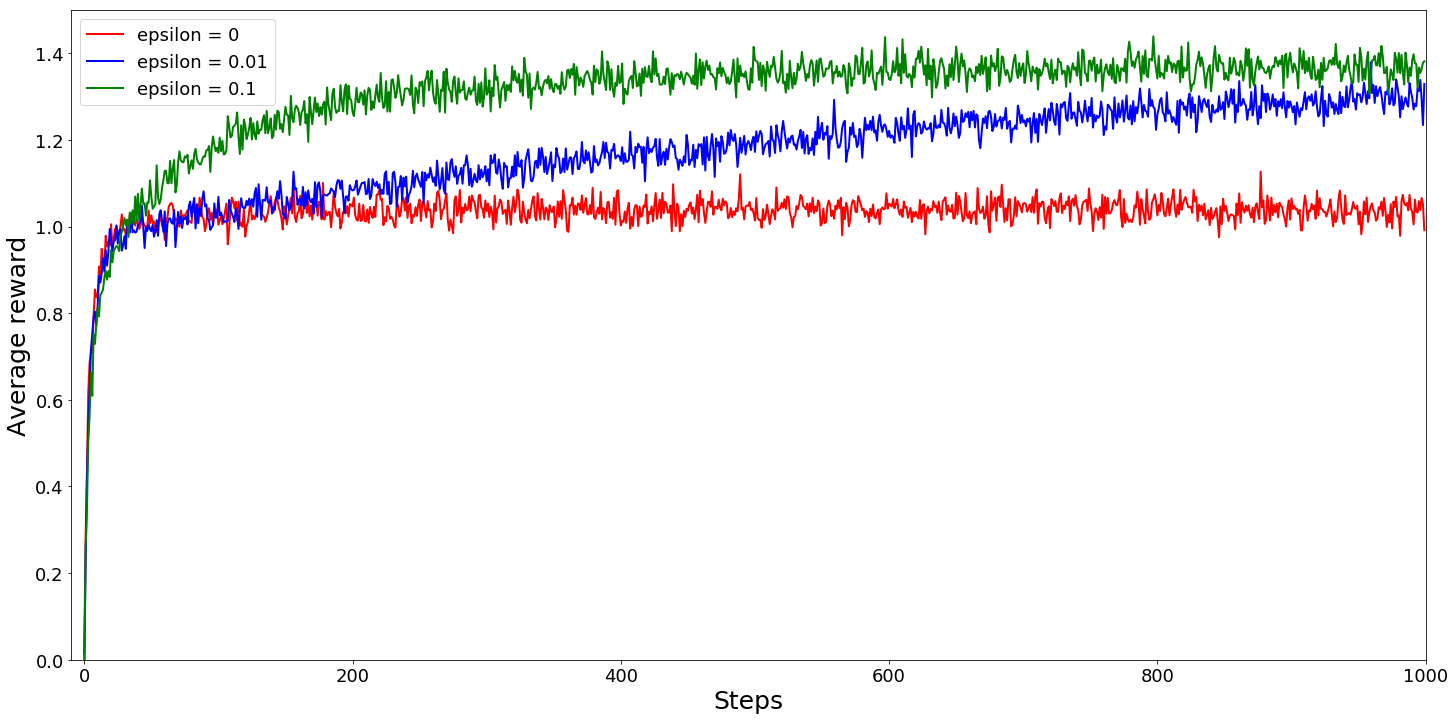

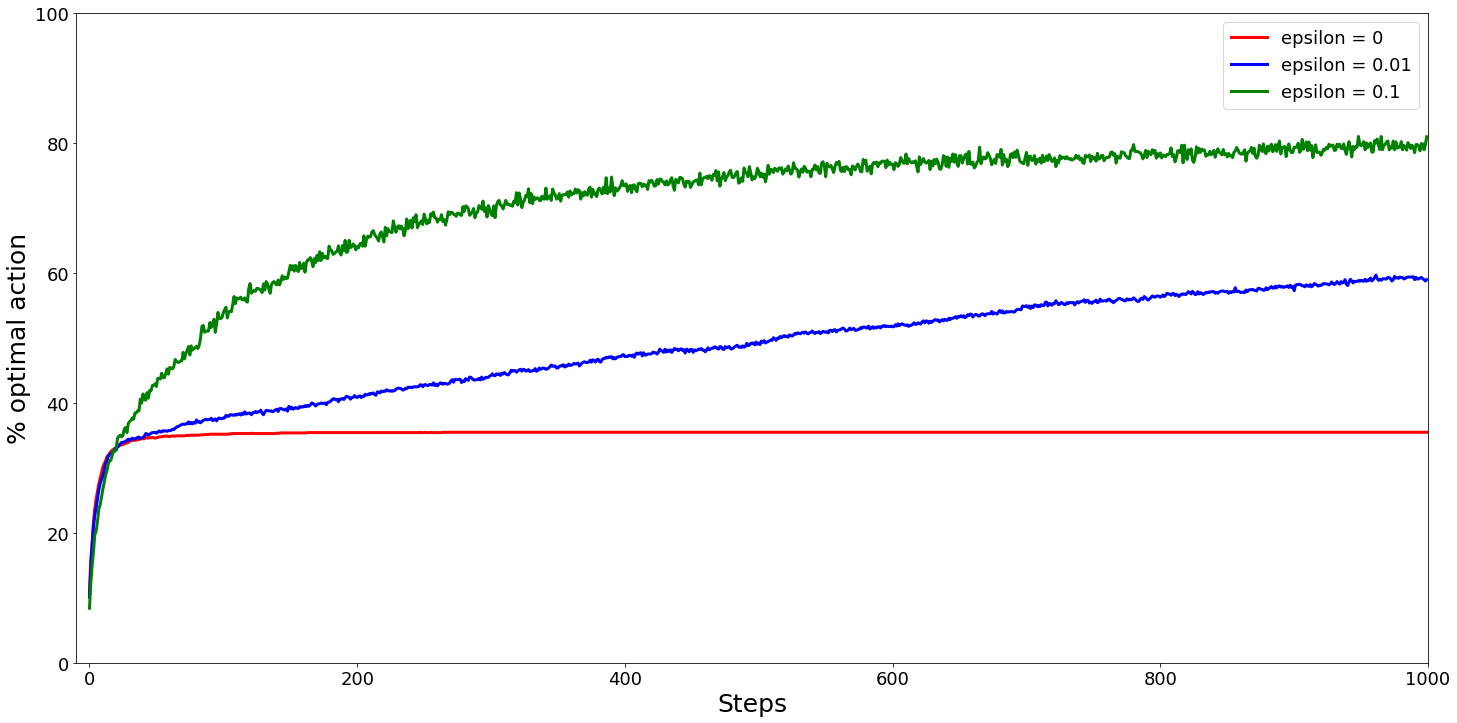

In [4]:
plt.figure(figsize=(20, 10))
plt.plot(average_reward_epsi_0_00/N_tasks, 'r', linewidth= 2)
plt.plot(average_reward_epsi_0_01/N_tasks, 'b', linewidth= 2)
plt.plot(average_reward_epsi_0_1/N_tasks, 'g', linewidth= 2)
plt.ylim(0,1.5)
plt.xlim(-10,1000)
plt.gca().legend(('epsilon = 0', 'epsilon = 0.01', 'epsilon = 0.1'), fontsize=18)
plt.xlabel('Steps', fontsize=25)
plt.ylabel('Average reward', fontsize=25)
plt.tight_layout()
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)

plt.figure(figsize=(20, 10))
plt.plot((average_optimal_action_0_00/N_tasks)*100, 'r', linewidth= 3)
plt.plot((average_optimal_action_0_01/N_tasks)*100, 'b', linewidth= 3)
plt.plot((average_optimal_action_0_1/N_tasks)*100, 'g', linewidth= 3)
plt.ylim(0,100)
plt.xlim(-10,1000)
plt.gca().legend(('epsilon = 0', 'epsilon = 0.01', 'epsilon = 0.1'), fontsize=18)
plt.xlabel('Steps', fontsize=25)
plt.ylabel('% optimal action', fontsize=25)
plt.tight_layout()
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)